In [45]:
#Importing packages
from pandas import read_csv



In [46]:
# load the dataset
data = read_csv(r'C:\Users\ganes\Documents\EEG project\raw_data\EEG_Eye_State.csv',error_bad_lines=False)



C:\Users\ganes\AppData\Local\Temp\ipykernel_16584\3479145912.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = read_csv(r'C:\Users\ganes\Documents\EEG project\raw_data\EEG_Eye_State.csv',error_bad_lines=False)


In [47]:
#print
data

,AF3,F7,F3,FC5,T7,P7,O1,O1.1,P8,T8,FC6,F4,F8,AF4,CLASS
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


In [181]:
data.columns

Index(['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O1.1', 'P8', 'T8', 'FC6',
       'F4', 'F8', 'AF4', 'CLASS'],
      dtype='object')

In [182]:
del data['O1.1']

In [183]:
data.columns

Index(['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'P8', 'T8', 'FC6', 'F4',
       'F8', 'AF4', 'CLASS'],
      dtype='object')

In [184]:
# retrieve data as numpy array
values = data.values
values

array([[  300.66666667,   -19.33333333,   260.66666667, ...,
          610.66666667,   360.66666667, -4029.33333333],
       [  295.33333333,   -24.66666667,   265.33333333, ...,
          605.33333333,   355.33333333, -4024.66666667],
       [  304.        ,   -16.        ,   274.        , ...,
          604.        ,   364.        , -4026.        ],
       ...,
       [  278.6       ,   -11.4       ,   248.6       , ...,
          588.6       ,   338.6       , -4000.4       ],
       [  272.6       ,   -17.4       ,   242.6       , ...,
          592.6       ,   342.6       , -4006.4       ],
       [  277.93333333,   -12.06666667,   247.93333333, ...,
          587.93333333,   337.93333333, -4011.06666667]])

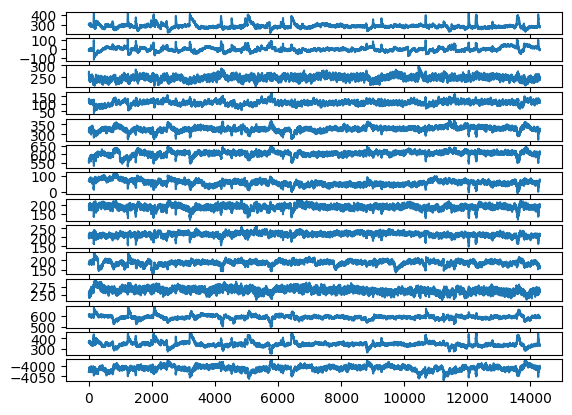

In [185]:
# create a subplot for each time series
pyplot.figure()
for i in range(values.shape[1]):
 pyplot.subplot(values.shape[1], 1, i+1)
 pyplot.plot(values[:, i])
pyplot.show()

In [186]:
# remove outliers from the EEG data
from pandas import read_csv
from numpy import mean
from numpy import std
from numpy import delete
from numpy import savetxt
# load the dataset.
data = read_csv(r'C:\Users\ganes\Documents\EEG project\raw_data\EEG_Eye_State.csv',error_bad_lines=False)
values = data.values
# step over each EEG column
for i in range(values.shape[1] - 1):
 # calculate column mean and standard deviation
 data_mean, data_std = mean(values[:,i]), std(values[:,i])
 # define outlier bounds
 cut_off = data_std * 4
 lower, upper = data_mean - cut_off, data_mean + cut_off
 # remove too small
 too_small = [j for j in range(values.shape[0]) if values[j,i] < lower]
 values = delete(values, too_small, 0)
 print('>deleted %d rows' % len(too_small))
 # remove too large
 too_large = [j for j in range(values.shape[0]) if values[j,i] > upper]
 values = delete(values, too_large, 0)
 print('>deleted %d rows' % len(too_large))
# save the results to a new file
savetxt(r'C:\Users\ganes\Documents\EEG project\clean_data\EEG_Eye_State_no_outliers.csv', values, delimiter=',')

C:\Users\ganes\AppData\Local\Temp\ipykernel_16584\1643519348.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = read_csv(r'C:\Users\ganes\Documents\EEG project\raw_data\EEG_Eye_State.csv',error_bad_lines=False)


>deleted 0 rows
>deleted 1 rows
>deleted 2 rows
>deleted 1 rows
>deleted 0 rows
>deleted 142 rows
>deleted 0 rows
>deleted 48 rows
>deleted 0 rows
>deleted 153 rows
>deleted 0 rows
>deleted 43 rows
>deleted 0 rows
>deleted 0 rows
>deleted 0 rows
>deleted 15 rows
>deleted 0 rows
>deleted 5 rows
>deleted 10 rows
>deleted 0 rows
>deleted 21 rows
>deleted 53 rows
>deleted 0 rows
>deleted 12 rows
>deleted 58 rows
>deleted 53 rows
>deleted 0 rows
>deleted 59 rows


In [187]:
type(values)

numpy.ndarray

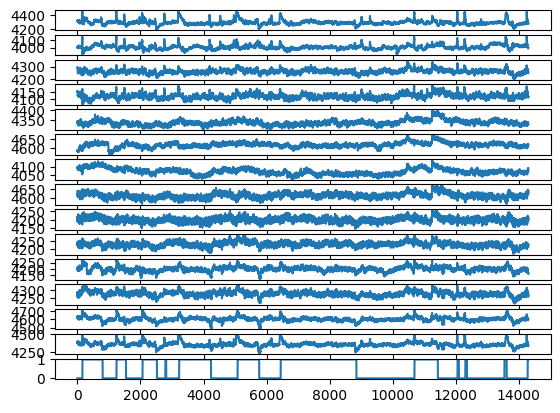

In [188]:
# visualize dataset without outliers
from pandas import read_csv
from matplotlib import pyplot
# load the dataset
data = read_csv(r'C:\Users\ganes\Documents\EEG project\clean_data\EEG_Eye_State_no_outliers.csv')
# retrieve data as numpy array
values = data.values
# create a subplot for each time series
pyplot.figure()
for i in range(values.shape[1]):
 pyplot.subplot(values.shape[1], 1, i+1)
 pyplot.plot(values[:, i])
pyplot.show()

In [191]:
data = read_csv(r'C:\Users\ganes\Documents\EEG project\clean_data\EEG_Eye_State_no_outliers_.csv')
data

,AF3,F7,F3,FC5,T7,P7,O1,O1.1,P8,T8,FC6,F4,F8,AF4,CLASS
0,4330.0,4010.0,4290.0,4150.0,4350.0,4590.0,4100.0,4640.0,4220.0,4240.0,4210.0,4280.0,4640.0,4390.0,0.0
1,4320.0,4000.0,4290.0,4150.0,4340.0,4590.0,4100.0,4640.0,4210.0,4230.0,4210.0,4280.0,4630.0,4380.0,0.0
2,4330.0,4010.0,4300.0,4160.0,4340.0,4580.0,4100.0,4630.0,4210.0,4220.0,4210.0,4280.0,4630.0,4390.0,0.0
3,4330.0,4010.0,4300.0,4160.0,4340.0,4580.0,4100.0,4630.0,4220.0,4240.0,4210.0,4290.0,4630.0,4400.0,0.0
4,4330.0,4010.0,4290.0,4150.0,4350.0,4590.0,4100.0,4630.0,4210.0,4240.0,4210.0,4290.0,4630.0,4400.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14299,4280.0,3990.0,4250.0,4120.0,4330.0,4610.0,4070.0,4630.0,4200.0,4220.0,4170.0,4270.0,4590.0,4340.0,1.0
14300,4280.0,3990.0,4250.0,4110.0,4330.0,4620.0,4070.0,4620.0,4190.0,4220.0,4160.0,4260.0,4590.0,4330.0,1.0
14301,4280.0,3990.0,4250.0,4110.0,4330.0,4620.0,4070.0,4620.0,4190.0,4210.0,4160.0,4260.0,4590.0,4340.0,1.0
14302,4280.0,3990.0,4250.0,4120.0,4330.0,4620.0,4080.0,4630.0,4200.0,4220.0,4170.0,4270.0,4600.0,4350.0,1.0


In [192]:
data.columns

Index(['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O1.1', 'P8', 'T8', 'FC6',
       'F4', 'F8', 'AF4', 'CLASS'],
      dtype='object')

In [193]:
del data["O1.1"]

In [66]:
import mne

In [194]:
info= mne.create_info(list(data.columns),ch_types=['eeg']*len(data.columns),sfreq=128)
#info.set_montage('standard_1020')
data_new=mne.io.RawArray(data.T,info)


Creating RawArray with float64 data, n_channels=14, n_times=14304
    Range : 0 ... 14303 =      0.000 ...   111.742 secs
Ready.


In [195]:
data_new=mne.io.RawArray(data.T,info)
data_new.set_eeg_reference()
epochs=mne.make_fixed_length_epochs(data_new,duration=3,overlap=2)
epochs.get_data()

Creating RawArray with float64 data, n_channels=14, n_times=14304
    Range : 0 ... 14303 =      0.000 ...   111.742 secs
Ready.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Not setting metadata
109 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 109 events and 384 original time points ...
0 bad epochs dropped


array([[[ 3.44285714e+02,  3.39285714e+02,  3.47142857e+02, ...,
          3.32785714e+02,  3.35642857e+02,  3.28500000e+02],
        [ 2.42857143e+01,  1.92857143e+01,  2.71428571e+01, ...,
          2.27857143e+01,  1.56428571e+01,  1.85000000e+01],
        [ 3.04285714e+02,  3.09285714e+02,  3.17142857e+02, ...,
          2.82785714e+02,  2.85642857e+02,  2.88500000e+02],
        ...,
        [ 6.54285714e+02,  6.49285714e+02,  6.47142857e+02, ...,
          6.52785714e+02,  6.55642857e+02,  6.48500000e+02],
        [ 4.04285714e+02,  3.99285714e+02,  4.07142857e+02, ...,
          4.02785714e+02,  3.95642857e+02,  3.98500000e+02],
        [-3.98571429e+03, -3.98071429e+03, -3.98285714e+03, ...,
         -3.96621429e+03, -3.96335714e+03, -3.97050000e+03]],

       [[ 3.21428571e+02,  3.23571429e+02,  3.28571429e+02, ...,
          3.12785714e+02,  3.12071429e+02,  3.09928571e+02],
        [ 2.14285714e+01,  3.35714286e+01,  3.85714286e+01, ...,
          5.27857143e+01,  5.20714286e

In [196]:
data_new

<RawArray | 14 x 14304 (111.7 s), ~1.5 MB, data loaded>

In [197]:
raw=mne.io.RawArray(data.T,info)

Creating RawArray with float64 data, n_channels=14, n_times=14304
    Range : 0 ... 14303 =      0.000 ...   111.742 secs
Ready.


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)


C:\Users\ganes\AppData\Local\Temp\ipykernel_16584\2847632005.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()
C:\python311\Lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


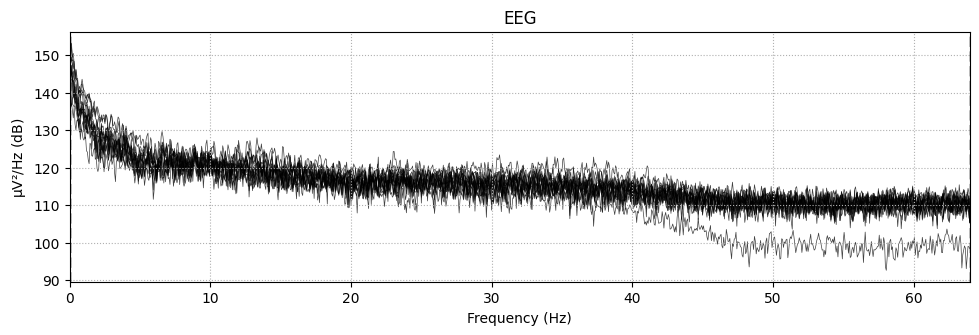

In [198]:
raw.plot_psd()

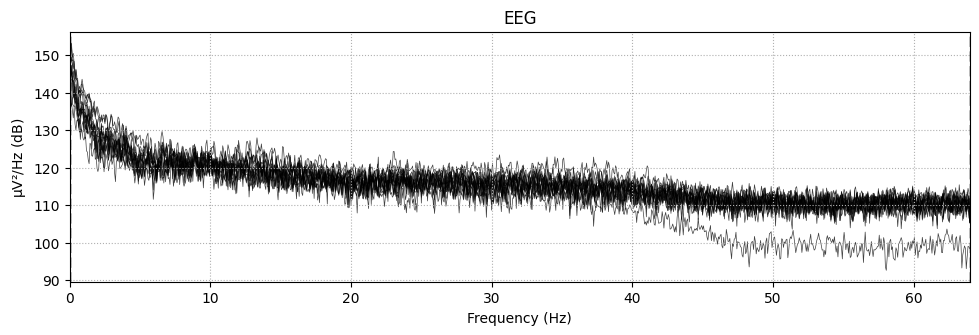

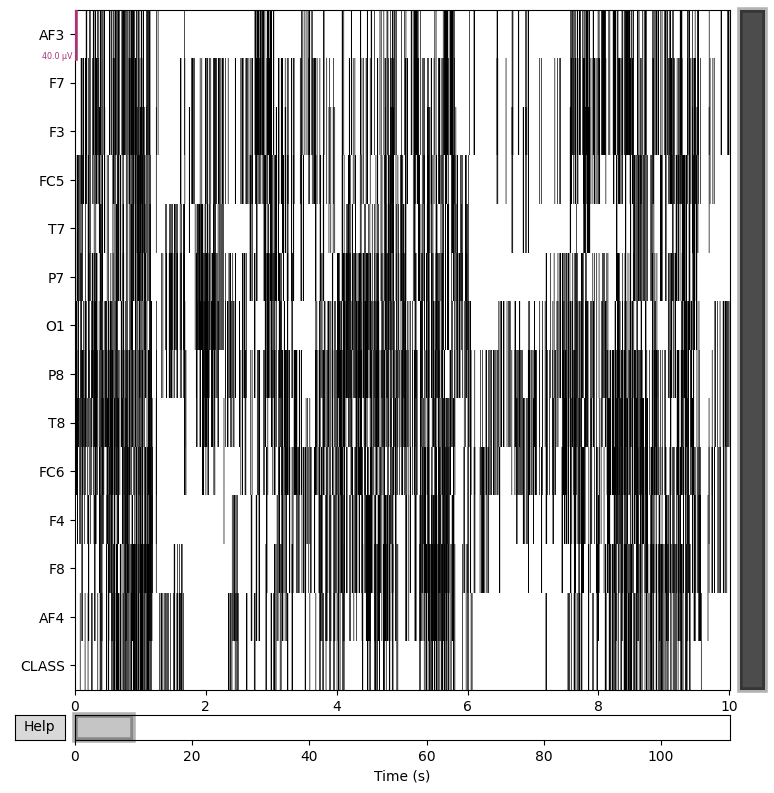

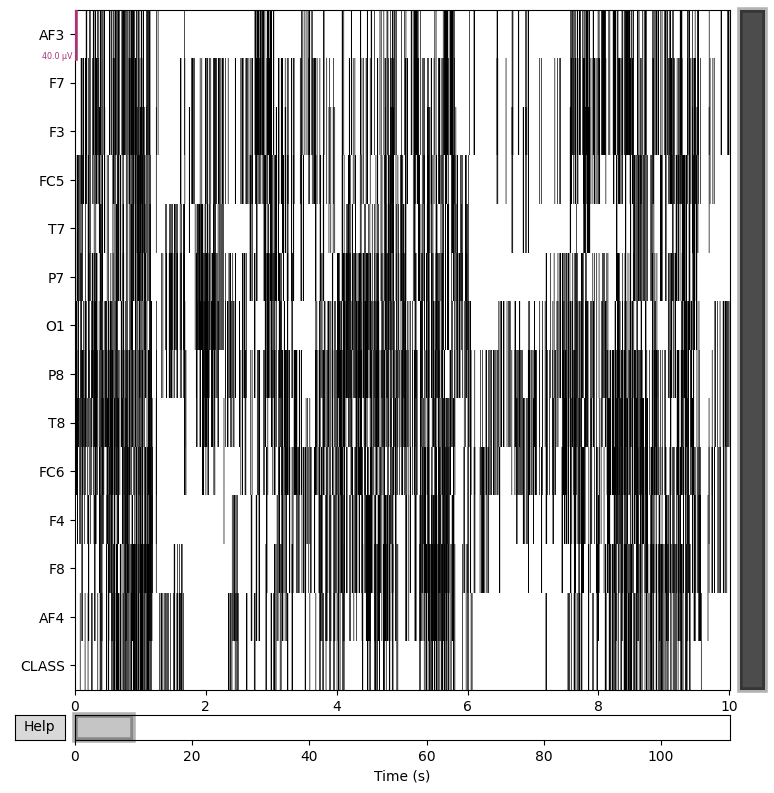

In [199]:
raw.plot()

In [200]:
ica = mne.preprocessing.ICA(n_components=14, random_state=0)

In [201]:
ica.fit(raw.copy().filter(8, 35))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 213 samples (1.664 sec)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished


Fitting ICA took 0.4s.


C:\Users\ganes\AppData\Local\Temp\ipykernel_16584\2225378374.py:1: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (3.8) and smallest (6.4e-27) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(raw.copy().filter(8, 35))


Method,fastica
Fit,67 iterations on raw data (14304 samples)
ICA components,14
Available PCA components,14
Channel types,eeg
ICA components marked for exclusion,—


In [203]:
epochs[1]

Number of events,1
Events,1: 1
Time range,0.000 – 2.992 sec
Baseline,off


In [204]:
epochs[2:102]

Number of events,100
Events,1: 100
Time range,0.000 – 2.992 sec
Baseline,off


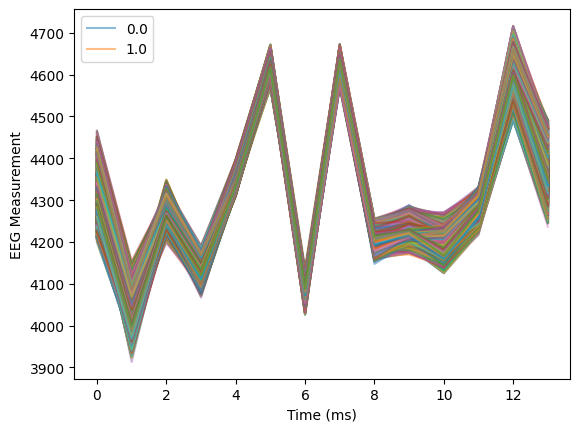

In [205]:
import numpy as np
import matplotlib.pyplot as plt

# load the EEG data
eeg_data = values

# extract the eye state labels from the data
eye_state = eeg_data[:, -1]

# extract the EEG measurements from the data
eeg_measurements = eeg_data[:, :-1]

# plot the EEG measurements for each eye state
for state in np.unique(eye_state):
    plt.plot(eeg_measurements[eye_state == state].T, alpha=0.5)

# set the x-axis label
plt.xlabel('Time (ms)')

# set the y-axis label
plt.ylabel('EEG Measurement')

# add a legend to the plot
plt.legend(np.unique(eye_state))

# display the plot
plt.show()


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Using data from preloaded Raw for 1 events and 384 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


C:\Users\ganes\AppData\Local\Temp\ipykernel_16584\1173223936.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs[1].plot_psd(picks='eeg')
C:\python311\Lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


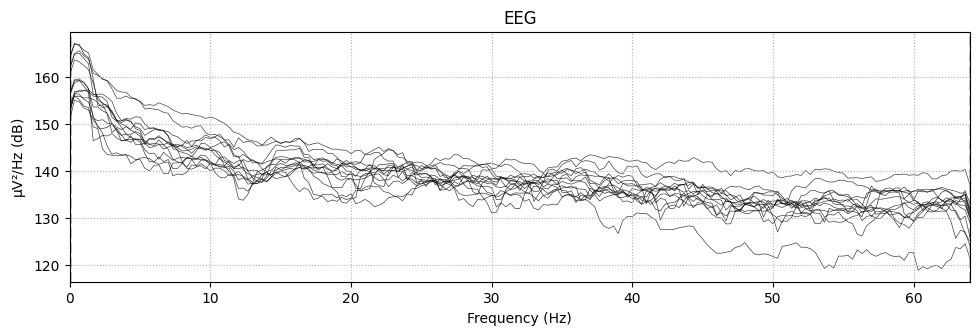

In [207]:
epochs[1].plot_psd(picks='eeg')

['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'CLASS']
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 423 samples (3.305 sec)

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by number: 14 components


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished


Fitting ICA took 1.9s.
Creating RawArray with float64 data, n_channels=14, n_times=14304
    Range : 0 ... 14303 =      0.000 ...   111.742 secs
Ready.


C:\Users\ganes\AppData\Local\Temp\ipykernel_16584\224339703.py:13: RuntimeWarning: Using n_components=14 (resulting in n_components_=14) may lead to an unstable mixing matrix estimation because the ratio between the largest (6.9) and smallest (2.9e-27) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 13
  ica.fit(filt_raw)


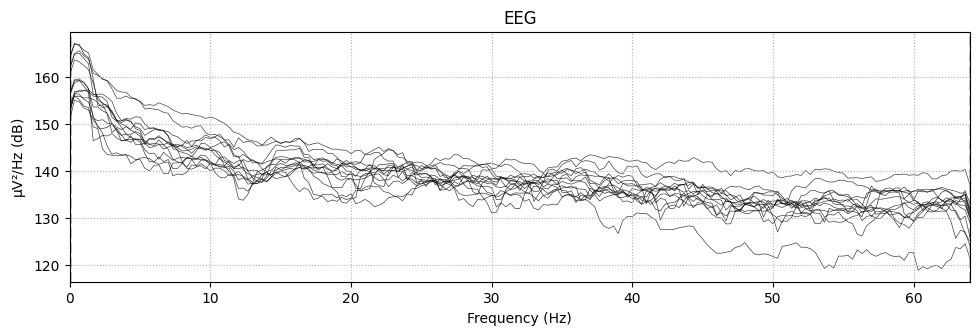

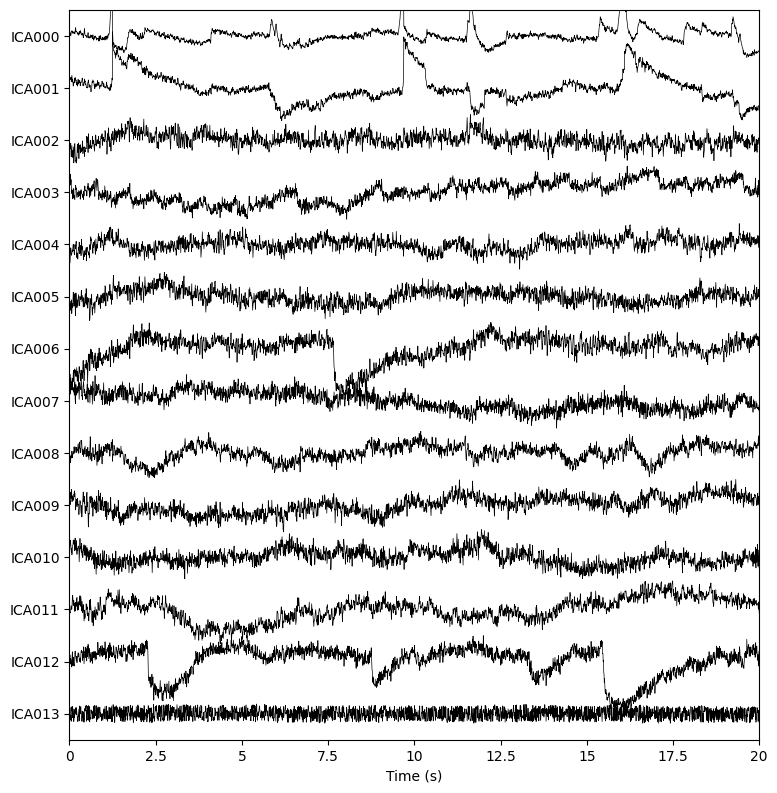

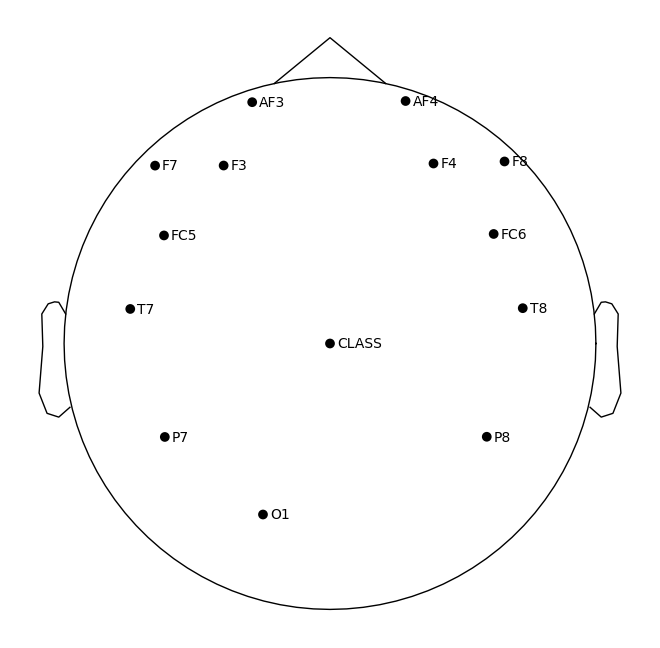

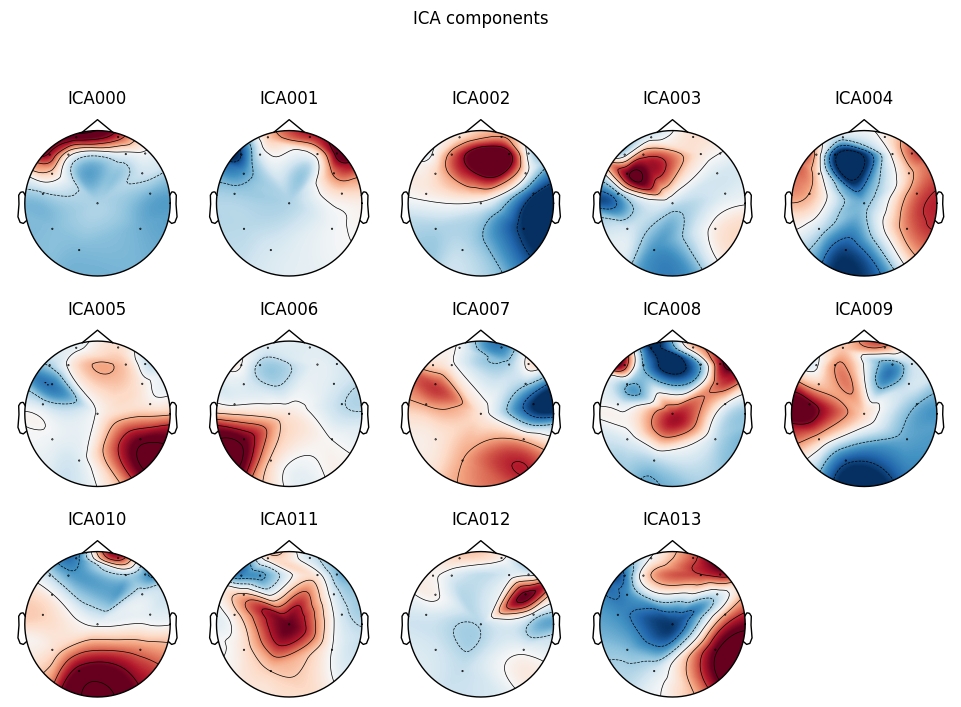

[<MNEFigure size 975x731.5 with 14 Axes>]

In [209]:




from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap)

montage = mne.channels.make_standard_montage('standard_1020')

raw.set_montage(montage, on_missing='ignore')

print(raw.ch_names)

filt_raw = raw.copy().filter(l_freq=1., h_freq=None)

ica = ICA(n_components=14, max_iter='auto', random_state=97)
ica.fit(filt_raw)
ica

raw.load_data()
ica.plot_sources(raw, show_scrollbars=False)
raw.plot_sensors(ch_type='eeg', show_names=True)

ica.plot_components()
